In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import textwrap
from matplotlib.lines import Line2D
import pickle

In [14]:
def saveAsPDF(filename):
    # Save the plot as a PDF for LaTeX embedding
    output_pdf = f'/work3/s174159/LLM_Thesis/plots/img_pdf/{filename}.pdf'
    plt.savefig(output_pdf)
    print("Saved image")

In [15]:
relation_mapping = None
with open("/work3/s174159/LLM_Thesis/class_mapping.pkl", "rb") as openfile:
    relation_mapping = pickle.load(openfile)

if relation_mapping == None:
    raise ModuleNotFoundError

relation_mapping["Sister city"] = "document-based"

occurences = None
with open("/work3/s174159/LLM_Thesis/class_occurrences.pkl", "rb") as openfile:
    occurences = pickle.load(openfile)

if occurences == None:
    raise ModuleNotFoundError


def get_color_for_class(cls):
    try:
        match relation_mapping[cls.strip()]:
            case "both":
                return "tab:green"
            case "sentence-based":
                return "tab:blue"
            case "document-based":
                return "tab:purple"
            case _:
                print(f"'{relation_mapping[cls.strip()]}' could not read correctly")
                raise ValueError
    except KeyError:
        # print(f"'{cls}' is not in relation_mapping, might be hallucination")
        print(cls)
        return "black"


def plot_data(data_filepath: os.PathLike, run_title: str, top: int = 10):
    data = pd.read_csv(data_filepath, delimiter=";")
    zero_data = data[data["f1"] == 0]
    # zero_data
    data = data[data["f1"] != 0]
    # data = data[data["class"] == "test_rel"]

    # data.loc[data['class'] != 'ALL', data.columns != 'class']

    # data = data.rename(columns={"test_rel": "ALL"})
    data.at[0,'class']='ALL'

    print(data)

    best_worst_all = pd.concat(
        [
            data[data["class"] == "ALL"],
            data[data["class"] != "ALL"].sort_values("f1").tail(top),
            data[data["class"] != "ALL"].sort_values("f1").head(top),
        ]
    ).sort_values("f1")
    # best_worst_all
    species = wrapped_labels = [label for label in best_worst_all["class"].to_list()]
    measurements = {
        "f1": best_worst_all["f1"].to_list(),
        "Precision": best_worst_all["p"].to_list(),
        "Recall": best_worst_all["r"].to_list(),
    }

    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout="constrained", figsize=(10, 5))

    for attribute, measurement in measurements.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=0)
        # ax.bar_label(rects, padding=0)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Score %")
    ax.set_title(f"{run_title} Top and Bottom 10 F1, Precision and Recall Scores")
    ax.set_xticks(x + width, species)
    ax.legend(loc="upper left", ncols=3)
    ax.set_ylim(0, 100)
    plt.xticks(rotation=42, fontsize=8, ha="right", rotation_mode="anchor")
    for tick_label in ax.get_xticklabels():
        label_text = tick_label.get_text()
        if "ALL" == label_text:  # Check if the label contains 'ALL'
            tick_label.set_fontweight("bold")  # Set font weight to bold
        else:
            tick_label.set_color(get_color_for_class(label_text))
    # ax.axhline(16.5, lw=0.6, color="grey")
    # ax.axhline(33.4, lw=0.6, color="grey")
    # ax.axhline(50, lw=0.6, color="grey")
    # ax.axhline(66.6, lw=0.6, color="grey")
    # ax.axhline(83.5, lw=0.6, color="grey")

    ax.legend(
        handles=[
            Line2D([0], [0], color="tab:blue", lw=4, label="F1"),
            Line2D([0], [0], color="tab:orange", lw=4, label="Precision"),
            Line2D([0], [0], color="tab:green", lw=4, label="Recall"),
            # Line2D([0], [0], color='black',marker='o', lw=4, color='w', label="Recall")
            # Line2D(
            #     [0],
            #     [0],
            #     marker="o",
            #     color="w",
            #     label="#of Occurences",
            #     markerfacecolor="black",
            #     markersize=10,
            # ),
        ],
        loc="upper left",
        ncols=3,
        fontsize=10
    )

    # x = [i for i, cls in enumerate(best_worst_all["class"]) if cls != "ALL"]
    # y = [occurences[best_worst_all["class"].iloc[i]] for i in x]

    # ax2 = ax.twinx()
    # ax2.scatter(
    #     x, y, color="black", label="Number of occurences", zorder=4, s=60
    # )  # s=60 adjusts the size of the dots
    # ax2.set_ylabel("Number of occurences", fontsize=14, color="black")
    # ax2.tick_params(axis="y", labelcolor="black")
    # # # ax2.grid(True, which="both",axis="y", linestyle="-")

    # # # Align the scales if necessary to avoid a visual shift in the y-axes

    # ax2.set_ylim(0, 6000)  # Since F1 score is between 0 and 1
    saveAsPDF(f'{run_title.replace(" ", "_")}_TOP_BOTTOM')
    plt.show()

    print("Classes with zero f1")

    return zero_data

In [16]:
data = pd.read_csv("/work3/s174159/LLM_Thesis/GEM MIG!/Results/BERT_DEFAULT/DREEAM_DEFAULT.csv", delimiter=";")
# data[data["class"]=="test_rel"]["class"] = "ALL"
data.at[0,'class']='ALL'


In [17]:
relation_mapping

{'Nationality': 'sentence-based',
 'Capital': 'both',
 'Contains location': 'sentence-based',
 'Place of death': 'both',
 'Child': 'both',
 'Place of birth': 'both',
 'Place lived': 'sentence-based',
 'Located in': 'both',
 'Works for': 'sentence-based',
 'Neighborhood': 'sentence-based',
 'Founded in': 'sentence-based',
 'Founded by': 'both',
 'Shareholder of': 'sentence-based',
 'Ethnicity': 'sentence-based',
 'Religion': 'both',
 'Part of': 'both',
 'Used for': 'sentence-based',
 'Hyponym of': 'sentence-based',
 'Conjunction': 'sentence-based',
 'Feature of': 'sentence-based',
 'Evaluate for': 'sentence-based',
 'Compare': 'sentence-based',
 'Organization based in': 'sentence-based',
 'Live in': 'sentence-based',
 'Kill': 'sentence-based',
 'Role': 'sentence-based',
 'Named': 'sentence-based',
 'Win defeat': 'sentence-based',
 'Physical': 'sentence-based',
 'Topic': 'sentence-based',
 'Usage': 'sentence-based',
 'Type of': 'sentence-based',
 'Temporal': 'sentence-based',
 'Related t

                     class          p          r         f1
0                      ALL  48.478205  55.808237  50.354601
1                Performer  65.845387  84.517241  74.021989
2             Notable work  79.000000  76.923077  77.947706
3                 Has part  42.800000  74.058824  54.248666
4                Member of  54.950339  78.471380  64.637586
..                     ...        ...        ...        ...
115                 Social  33.434783  14.200000  19.933917
116      Unemployment rate   7.000000  24.400000  10.878981
117                  Named  69.000000  48.000000  56.615385
119             Win defeat  57.646617  52.447205  54.924134
120  Organization based in  86.956522  71.640000  78.558661

[115 rows x 4 columns]
Saved image


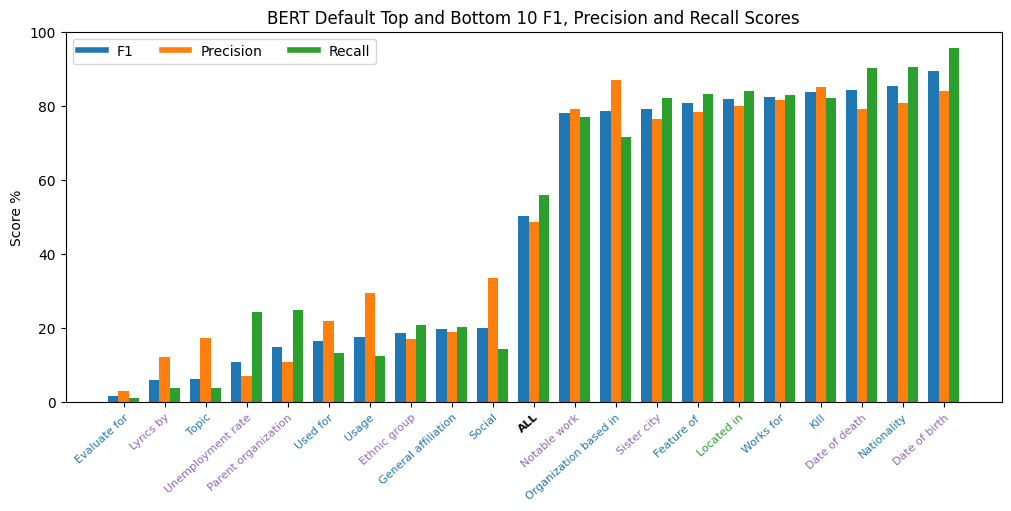

Classes with zero f1


,class,p,r,f1
82,Type of,0.000000,0.0,0.0
90,Related to,11.333333,0.0,0.0
92,Seperated from,0.000000,1.0,0.0
112,Compare,23.000000,0.0,0.0
114,Industry,0.000000,0.0,0.0
118,Influenced by,0.000000,0.0,0.0


In [18]:
plot_data("/work3/s174159/LLM_Thesis/GEM MIG!/Results/BERT_DEFAULT/DREEAM_DEFAULT.csv", "BERT Default")

                     class          p          r         f1
0                      ALL  54.978932  64.878220  60.475610
1                Performer        NaN        NaN  60.760284
2             Notable work  67.845387  86.517241  76.052031
3                 Has part  82.000000  77.923077  79.909572
4                Member of  59.800000  80.058824  68.462147
..                     ...        ...        ...        ...
113            Feature of   19.000000  31.702703  23.760128
114               Industry  76.390000  79.230000  77.784086
116      Unemployment rate  32.434783  41.400000  36.373101
118          Influenced by  69.000000  50.000000  57.983193
120  Organization based in  56.646617  50.447205  53.367476

[111 rows x 4 columns]
Saved image


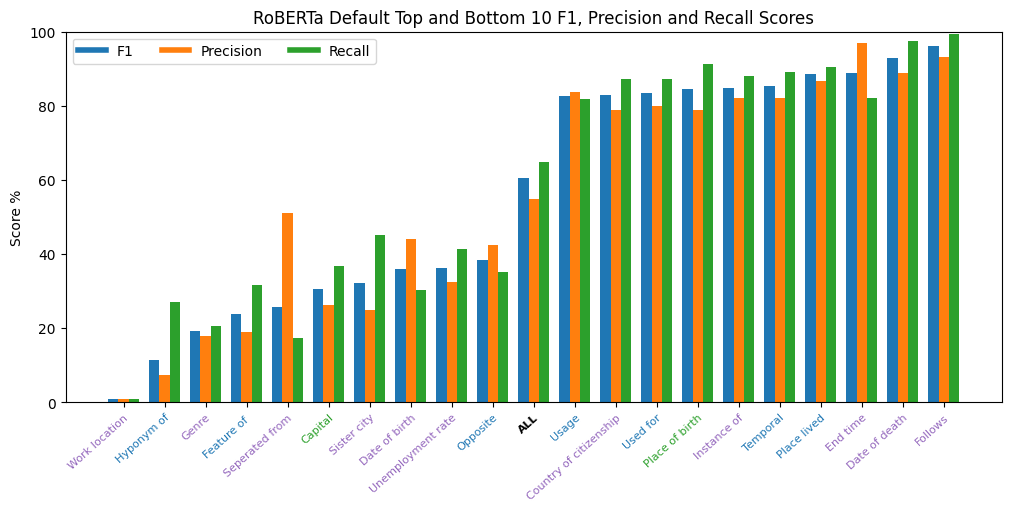

Classes with zero f1


,class,p,r,f1
51,Sibling,0.0,39.0,0.0
83,Position held,0.0,2.0,0.0
84,Neighborhood,0.0,3.0,0.0
89,Author,0.0,1.0,0.0
93,Kill,3.0,0.0,0.0
98,Claimed by,0.0,1.0,0.0
105,General affiliation,0.0,0.0,0.0
115,Social,0.0,0.0,0.0
117,Named,4.0,0.0,0.0
119,Win defeat,2.0,0.0,0.0


In [19]:
plot_data("/work3/s174159/LLM_Thesis/GEM MIG!/Results/ROBERTA_DEFAULT/DREEAM_ROBERTA_DEFAULT.csv", "RoBERTa Default")

                     class          p          r         f1
0                      ALL  56.754558  66.271557  62.037678
1                Performer        NaN        NaN  62.249116
2             Notable work  83.845387  88.517241  86.117999
3                 Has part  81.000000  80.923077  80.961520
4                Member of  81.800000  77.058824  79.358661
..                     ...        ...        ...        ...
113            Feature of   65.000000  69.000000  66.940299
114               Industry  81.390000  84.230000  82.785650
116      Unemployment rate  30.434783  41.400000  35.080499
118          Influenced by  66.000000  49.000000  56.243478
120  Organization based in  57.646617  48.447205  52.648070

[111 rows x 4 columns]
Saved image


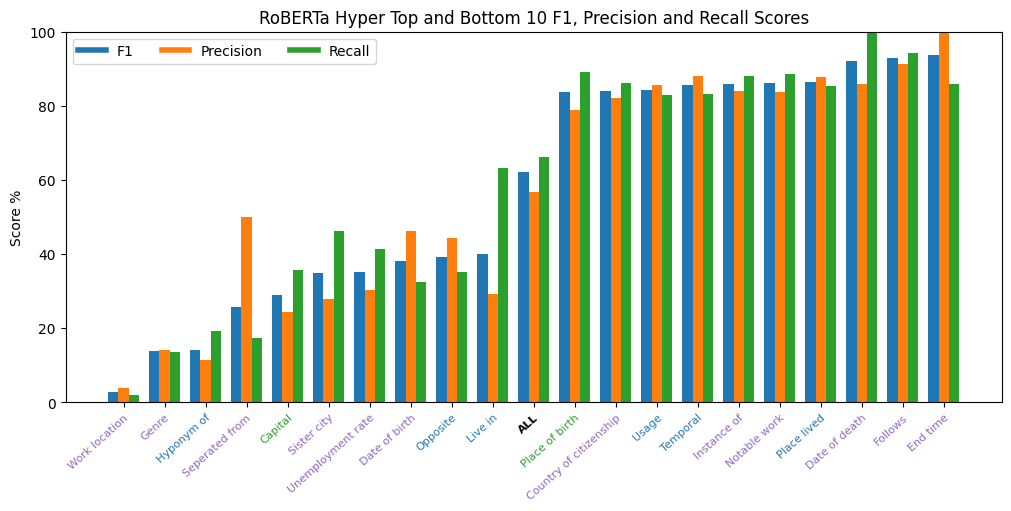

Classes with zero f1


,class,p,r,f1
51,Sibling,0.0,38.0,0.0
83,Position held,0.0,2.0,0.0
84,Neighborhood,0.0,0.0,0.0
89,Author,1.0,0.0,0.0
93,Kill,0.0,0.0,0.0
98,Claimed by,2.0,0.0,0.0
105,General affiliation,3.0,0.0,0.0
115,Social,4.0,0.0,0.0
117,Named,0.0,3.0,0.0
119,Win defeat,0.0,0.0,0.0


In [20]:
plot_data("/work3/s174159/LLM_Thesis/GEM MIG!/Results/ROBERTA_FINALIZED/DREEAM_Roberta_Hyper.csv", "RoBERTa Hyper")